In [13]:
# Make Notebook cells strech to fit the browsers's full width resolution
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Importing Libraries
import pandas as pd
import numpy as np
import os

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from glob import glob
from pathlib import Path

In [14]:
# Grab all files
# Also MAKE SURE TO ADD IN YOUR ABSOLUTE PATH BEFORE RUNNING IN 'df_files'. Please CRTL+F and replace
# with your own abolute path to this project directory.
# /Data/2023.csv = takes short amount of time to run
# /Data/20**.csv = takes long amount of time to run
df_files = sorted(glob("/Users/Gagan/Documents/Anaconda Projects/League Of Legends Esports Analysis - Group 1/Data/20**.csv")) # 20**.csv

# Combine all the files into one big dataframe
df = pd.concat((pd.read_csv(file, low_memory=False) for file in df_files))
print(df_files)

# Filter out bad data
df_completedGames = df[(df['datacompleteness'] == "complete") & (df['position'] != "team")] # & (df['position'] == "team") or & (df['position'] != "team") ### & (df['teamname'] != "unknown team") & (df['playername'] != "unknown player")

# Shape
print(df_completedGames.shape)
print(df_completedGames.dtypes)
print(df_completedGames.info())
df_completedGames.head()


['/Users/Gagan/Documents/Anaconda Projects/League Legends Win predictor/League Legends Win predictor/Data\\2014.csv', '/Users/Gagan/Documents/Anaconda Projects/League Legends Win predictor/League Legends Win predictor/Data\\2015.csv', '/Users/Gagan/Documents/Anaconda Projects/League Legends Win predictor/League Legends Win predictor/Data\\2016.csv', '/Users/Gagan/Documents/Anaconda Projects/League Legends Win predictor/League Legends Win predictor/Data\\2017.csv', '/Users/Gagan/Documents/Anaconda Projects/League Legends Win predictor/League Legends Win predictor/Data\\2018.csv', '/Users/Gagan/Documents/Anaconda Projects/League Legends Win predictor/League Legends Win predictor/Data\\2019.csv', '/Users/Gagan/Documents/Anaconda Projects/League Legends Win predictor/League Legends Win predictor/Data\\2020.csv', '/Users/Gagan/Documents/Anaconda Projects/League Legends Win predictor/League Legends Win predictor/Data\\2021.csv', '/Users/Gagan/Documents/Anaconda Projects/League Legends Win pr

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,TRLH3/33,complete,http://matchhistory.na.leagueoflegends.com/en/...,EU LCS,2014,Spring,0,2014-01-14 17:52:02,1.0,3.15,...,111.0,49.0,-560.0,-1.0,2.0,0.0,0.0,1.0,1.0,1.0
1,TRLH3/33,complete,http://matchhistory.na.leagueoflegends.com/en/...,EU LCS,2014,Spring,0,2014-01-14 17:52:02,1.0,3.15,...,95.0,-1107.0,-703.0,-36.0,0.0,2.0,2.0,2.0,0.0,0.0
2,TRLH3/33,complete,http://matchhistory.na.leagueoflegends.com/en/...,EU LCS,2014,Spring,0,2014-01-14 17:52:02,1.0,3.15,...,126.0,-145.0,-148.0,7.0,0.0,1.0,1.0,0.0,2.0,0.0
3,TRLH3/33,complete,http://matchhistory.na.leagueoflegends.com/en/...,EU LCS,2014,Spring,0,2014-01-14 17:52:02,1.0,3.15,...,103.0,1588.0,998.0,22.0,3.0,0.0,0.0,0.0,0.0,3.0
4,TRLH3/33,complete,http://matchhistory.na.leagueoflegends.com/en/...,EU LCS,2014,Spring,0,2014-01-14 17:52:02,1.0,3.15,...,23.0,887.0,476.0,-15.0,0.0,4.0,0.0,0.0,0.0,1.0


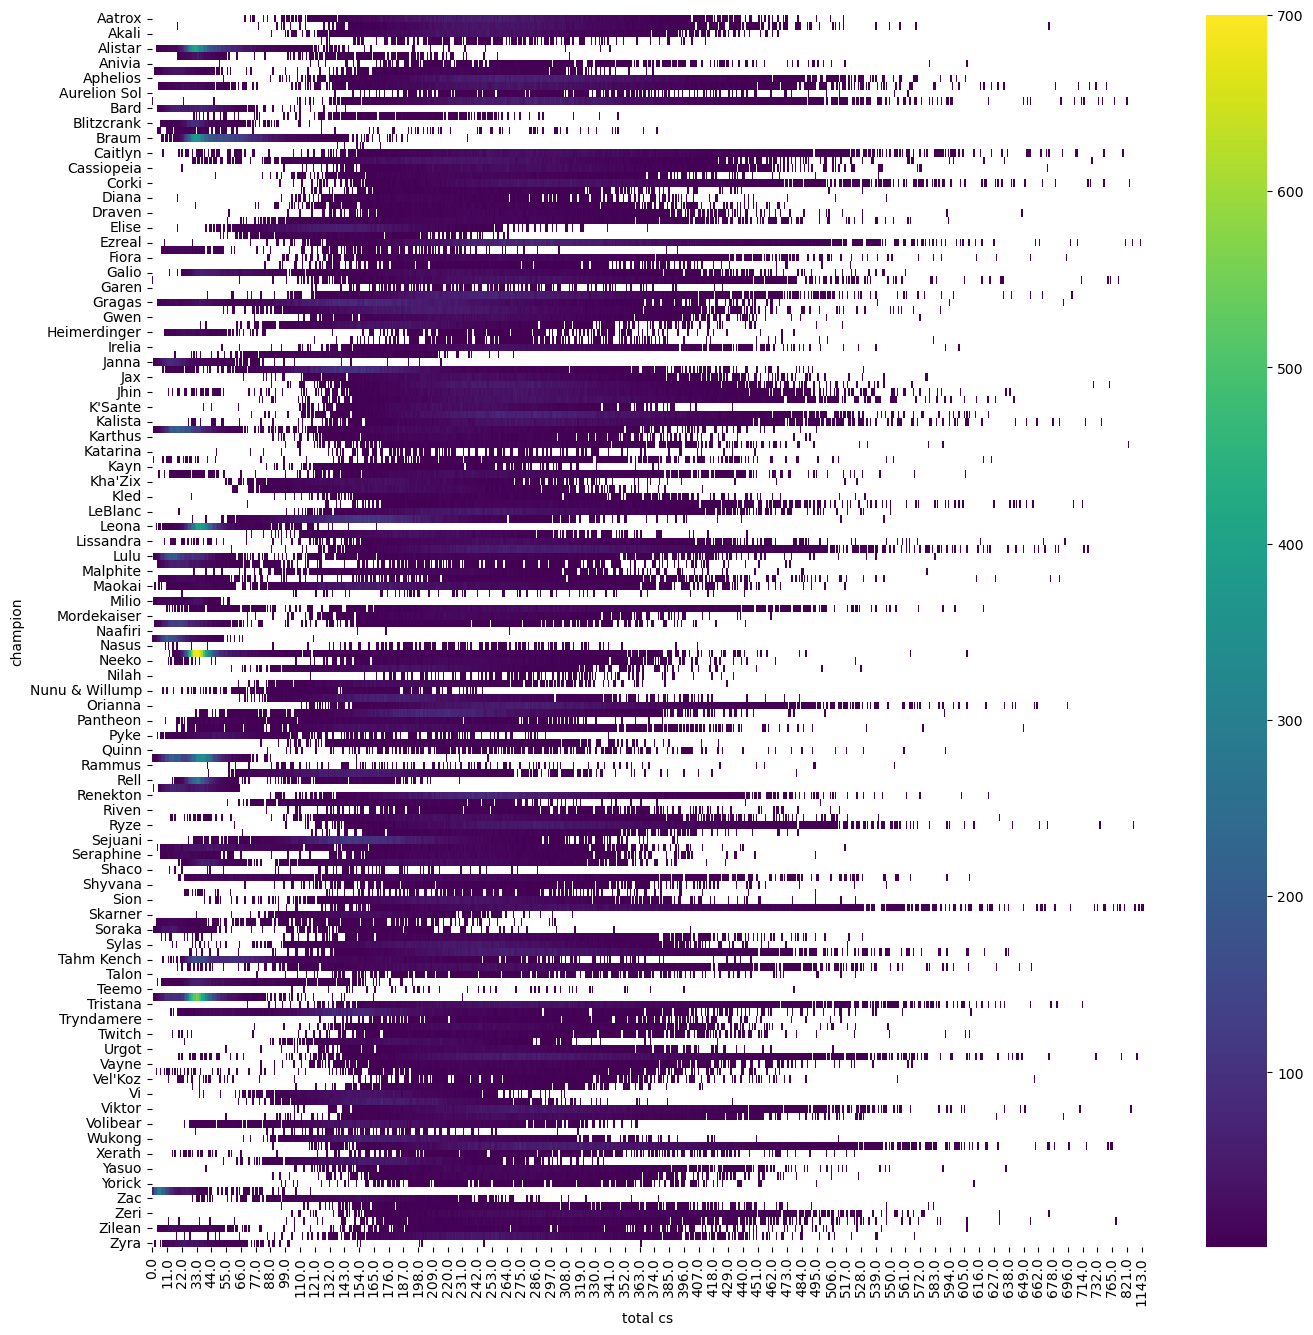

In [15]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(16, 16))
df_2dhist = pd.DataFrame({
    x_label: grp['champion'].value_counts()
    for x_label, grp in df_completedGames.groupby('total cs')#csdiffat15
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('total cs')
_ = plt.ylabel('champion')

                      gameid datacompleteness  \
30201       TRLH3/1002040109         complete   
1953     ESPORTSTMNT03/30652         complete   
76060  ESPORTSTMNT01/1431514         complete   
7773     ESPORTSTMNT06/40382         complete   
1336     ESPORTSTMNT06/20587         complete   
40636       TRLH1/1002230206         complete   
1293     ESPORTSTMNT06/20552         complete   
1269     ESPORTSTMNT06/20547         complete   
40965   ESPORTSTMNT06/720990         complete   
24525       TRNA1/1001151196         complete   

                                                     url  league  year  \
30201  http://matchhistory.na.leagueoflegends.com/en/...  EU LCS  2017   
1953   http://matchhistory.euw.leagueoflegends.com/en...     TCL  2017   
76060  http://matchhistory.na.leagueoflegends.com/en/...     OPL  2020   
7773   http://matchhistory.na.leagueoflegends.com/en/...     LJL  2017   
1336   http://matchhistory.na.leagueoflegends.com/en/...     LJL  2017   
40636  http://ma

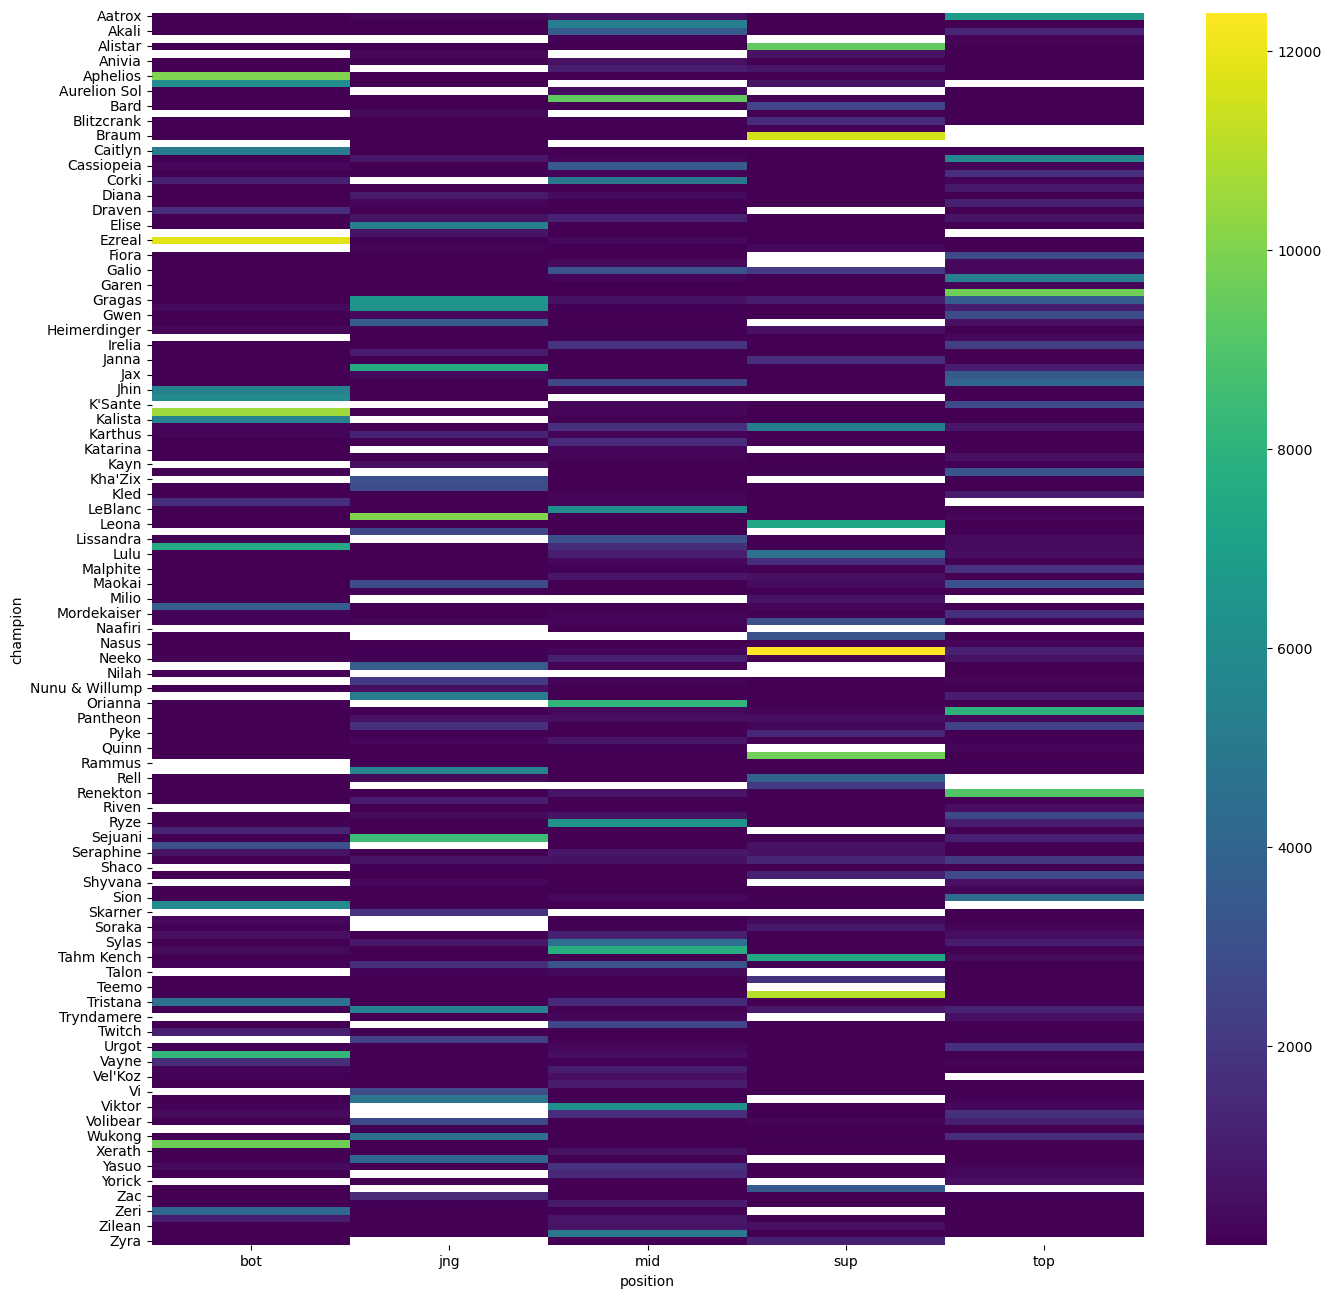

In [16]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

df_completedGamesSorted = df_completedGames.sort_values(by=['champion'], ascending=False)
print(df_completedGamesSorted[:10])

plt.subplots(figsize=(16, 16))
df_2dhist = pd.DataFrame({
    x_label: grp['champion'].value_counts()
    for x_label, grp in df_completedGamesSorted.groupby('position')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('position')
_ = plt.ylabel('champion')

In [17]:
team_results = df_completedGames.groupby(['gameid', 'teamname', 'gamelength', 'playername', 'champion', 'position', 'kills', 'deaths', 'assists', 'damagetochampions', 'totalgold', 'total cs', 'cspm', 'result']).size().unstack(fill_value=0)
print(team_results) 
team_resultsDF = team_results.pivot_table(index=['gameid', 'teamname', 'gamelength', 'playername', 'champion', 'position', 'kills', 'deaths', 'assists', 'damagetochampions', 'totalgold', 'total cs', 'cspm']).reset_index()
print(team_resultsDF)

result                                                                                                                                         0  \
gameid           teamname         gamelength playername champion   position kills deaths assists damagetochampions totalgold total cs cspm         
2899-3157        Invictus Gaming  1590       Baolan     Tahm Kench sup      0     1      9       4035.0            8348.0    84.0     3.1698   0   
                                             Duke       Ornn       top      3     1      3       9631.0            10791.0   218.0    8.2264   0   
                                             JackeyLove Ezreal     bot      3     1      7       23623.0           14028.0   276.0    10.4151  0   
                                             Ning       Kha'Zix    jng      3     0      5       6924.0            10831.0   194.0    7.3208   0   
                                             Rookie     Orianna    mid      3     1      8       19985.0        

In [18]:
champion_results = df_completedGames.groupby(['champion', 'result']).size().unstack().replace(np.nan,0) #'kills', 'deaths', 'damagetochampions', 'totalgold', 'total cs', 'cspm',

champion_results = champion_results.rename(columns = {champion_results.columns[0] : 'lost'})
champion_results = champion_results.rename(columns = {champion_results.columns[1] : 'won'})

champion_results['totalgamesplayed'] = (champion_results['won'] + champion_results['lost']).replace(np.nan,0)
champion_results['champion_WR'] = ((champion_results['won'] / (champion_results['won']+champion_results['lost'])) *100).replace(np.nan,0)# champion_results.sum(axis=1).replace(0,np.nan)
champion_results['champion_LR'] = ((champion_results['lost'] / (champion_results['won']+champion_results['lost'])) *100).replace(np.nan,0) # champion_results.sum(axis=1).replace(0,np.nan)

print(champion_results) 


result    lost   won  totalgamesplayed  champion_WR  champion_LR
champion                                                        
Aatrox    3682  3861              7543    51.186531    48.813469
Ahri      2584  2663              5247    50.752811    49.247189
Akali     2364  2443              4807    50.821718    49.178282
Akshan     106   122               228    53.508772    46.491228
Alistar   4688  4718              9406    50.159473    49.840527
...        ...   ...               ...          ...          ...
Zeri      2098  2095              4193    49.964226    50.035774
Ziggs      865   769              1634    47.062424    52.937576
Zilean     622   609              1231    49.471974    50.528026
Zoe       2411  2617              5028    52.048528    47.951472
Zyra       590   526              1116    47.132616    52.867384

[165 rows x 5 columns]


result   champion  lost   won  champion_LR  champion_WR  totalgamesplayed
85       Nautilus  7124  6679    51.611968    48.388032             13803
30         Ezreal  6267  5868    51.644005    48.355995             12135
16          Braum  6026  5607    51.800911    48.199089             11633
38         Gragas  5778  5794    49.930868    50.069132             11572
131        Thresh  5273  5770    47.749706    52.250294             11043
..            ...   ...   ...          ...          ...               ...
114         Shaco    36    28    56.250000    43.750000                64
77      Master Yi    45    18    71.428571    28.571429                63
130         Teemo    25    18    58.139535    41.860465                43
17          Briar     2     5    28.571429    71.428571                 7
82        Naafiri     2     1    66.666667    33.333333                 3

[165 rows x 6 columns]
result      champion  lost   won  champion_LR  champion_WR  totalgamesplayed
17         

C:\Users\Gagan\AppData\Local\Temp\ipykernel_26756\1806516943.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  calculated_rates_championsOverallDFSortedGamesPlayed[:10].plot(kind='scatter', y='totalgamesplayed', x='champion').set_xticklabels(calculated_rates_championsOverallDFSortedGamesPlayed[:10].iloc[:10]['champion'], fontdict=None, minor=False, fontsize=12, rotation=90)


[Text(0, 0, 'Master Yi'),
 Text(1, 0, 'Naafiri'),
 Text(2, 0, 'Nasus'),
 Text(3, 0, 'Xerath'),
 Text(4, 0, 'Teemo'),
 Text(5, 0, 'Katarina'),
 Text(6, 0, 'Shaco'),
 Text(7, 0, 'Kayn'),
 Text(8, 0, 'Brand'),
 Text(9, 0, 'Dr. Mundo')]

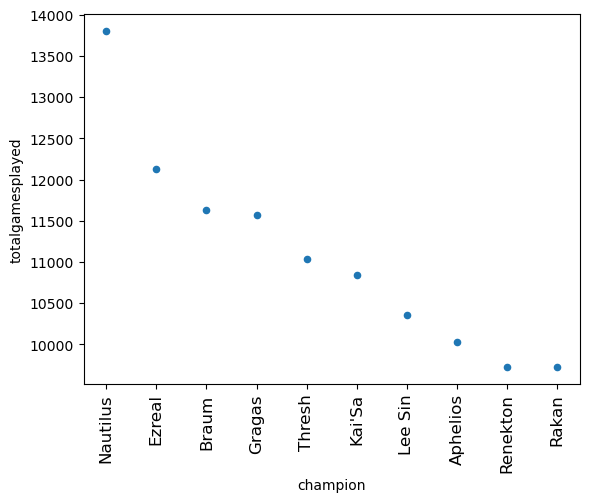

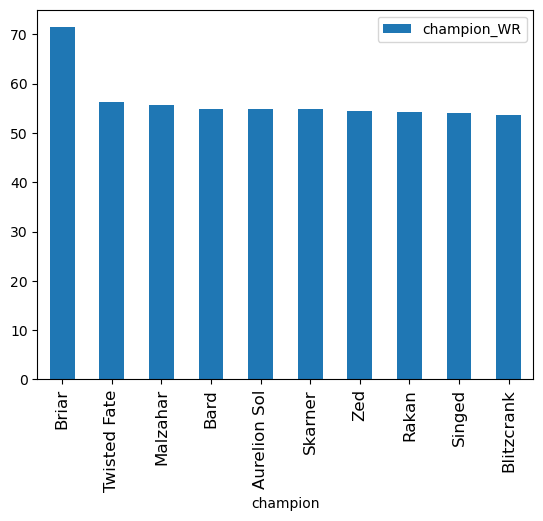

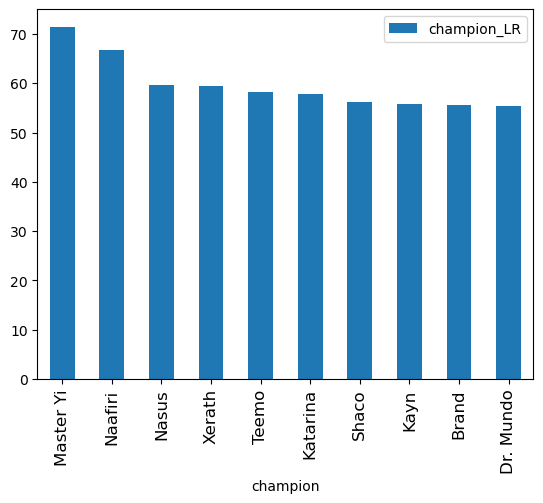

In [19]:
champion_resultsDF = champion_results.pivot_table(index=["champion", "lost", "won"]).reset_index()

calculated_rates_championsOverallDFSortedGamesPlayed = champion_resultsDF.drop_duplicates(subset = "champion").reset_index(drop=True).sort_values(by=['totalgamesplayed'], ascending=False)
print(calculated_rates_championsOverallDFSortedGamesPlayed)

calculated_rates_championsOverallDFSortedWinPercent = champion_resultsDF.drop_duplicates(subset = "champion").reset_index(drop=True).sort_values(by=['champion_WR'], ascending=False)
print(calculated_rates_championsOverallDFSortedWinPercent)

calculated_rates_championsOverallDFSortedLostPercent = champion_resultsDF.drop_duplicates(subset = "champion").reset_index(drop=True).sort_values(by=['champion_LR'], ascending=False)
print(calculated_rates_championsOverallDFSortedLostPercent)


calculated_rates_championsOverallDFSortedGamesPlayed[:10].plot(kind='scatter', y='totalgamesplayed', x='champion').set_xticklabels(calculated_rates_championsOverallDFSortedGamesPlayed[:10].iloc[:10]['champion'], fontdict=None, minor=False, fontsize=12, rotation=90)
calculated_rates_championsOverallDFSortedWinPercent[:10].plot(kind='bar', y='champion_WR', x='champion').set_xticklabels(calculated_rates_championsOverallDFSortedWinPercent[:10].iloc[:10]['champion'], fontdict=None, minor=False, fontsize=12, rotation=90)
calculated_rates_championsOverallDFSortedLostPercent[:10].plot(kind='bar', y='champion_LR', x='champion').set_xticklabels(calculated_rates_championsOverallDFSortedLostPercent[:10].iloc[:10]['champion'], fontdict=None, minor=False, fontsize=12, rotation=90)

In [20]:
team_champion_resultsMerged = team_resultsDF.merge(champion_resultsDF, on='champion', how='left')


print(team_champion_resultsMerged[:10].to_markdown())

#####################print(team_champion_resultsMerged.groupby(['gameid', 'teamname']).head())

grouped_df = team_champion_resultsMerged.groupby(['gameid', 'teamname', 'champion'])['champion_WR'].mean().reset_index()
print(grouped_df[:20].to_markdown())
print(grouped_df.shape)

overallCompositionWinrate = []

for (gameid, team), team_data in grouped_df.groupby(['gameid', 'teamname']):
      try:
         team_data = grouped_df[(grouped_df['teamname'] == team) & (grouped_df['gameid'] == gameid)]

         if not team_data.empty:
          team_avg_winrate = team_data['champion_WR'].mean()
          composition = team_data['champion'].tolist()

          overallCompositionWinrate.append((composition, team_avg_winrate))

      except IndexError:
        pass

overallCompositionWinrate = [(tuple(comp), winrate) for comp, winrate in overallCompositionWinrate]
overallCompositionDF = pd.DataFrame(overallCompositionWinrate, columns=['composition', 'winrate'])
overallCompositionDF['comp_counter'] = overallCompositionDF.groupby(['composition', 'winrate']).cumcount() + 1
print(overallCompositionDF.sort_values(by=['comp_counter', 'winrate'], ascending=False))

print(overallCompositionDF.sort_values(by=['comp_counter'], ascending=False))

print(overallCompositionDF.sort_values(by=['winrate'], ascending=False))

|    | gameid    | teamname            |   gamelength | playername   | champion   | position   |   kills |   deaths |   assists |   damagetochampions |   totalgold |   total cs |    cspm |   0 |   1 |   lost |   won |   champion_LR |   champion_WR |   totalgamesplayed |
|---:|:----------|:--------------------|-------------:|:-------------|:-----------|:-----------|--------:|---------:|----------:|--------------------:|------------:|-----------:|--------:|----:|----:|-------:|------:|--------------:|--------------:|-------------------:|
|  0 | 2899-3157 | Invictus Gaming     |         1590 | Baolan       | Tahm Kench | sup        |       0 |        1 |         9 |                4035 |        8348 |         84 |  3.1698 |   0 |   1 |   3888 |  3927 |       49.7505 |       50.2495 |               7815 |
|  1 | 2899-3157 | Invictus Gaming     |         1590 | Duke         | Ornn       | top        |       3 |        1 |         3 |                9631 |       10791 |        218 |  8.2264 